REGRESIÓN LINEAL SIMPLE

In [1]:
#Importacion ded librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/drive/My Drive")
print(os.getcwd())

Mounted at /content/drive
/content
/content/drive/My Drive


In [3]:
#Importacion de los datos
dataset = pd.read_csv("student_scores.csv", sep = ",")

In [4]:
#Vemos el dataset
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#Shape
dataset.shape

(25, 2)

In [6]:
#Analisis estadistico basico
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


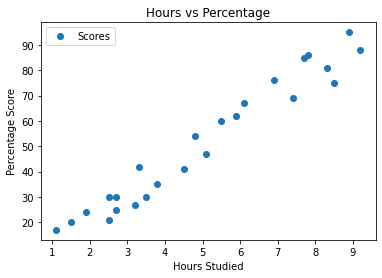

In [7]:
#Ploteamos el dataset
dataset.plot(x='Hours', y='Scores', style="o")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [8]:
#Preparacion de datos
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [9]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [11]:
#Empezamos a crear nuestro modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Entrenando el modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
#Recuperamos la intersección
print(regressor.intercept_)

2.826892353899737


In [14]:
#La pendiente
print(regressor.coef_)

[9.68207815]


In [15]:
#Hacemos nuestras predicciones
y_pred = regressor.predict(X_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

El y_pred es una matriz numpy que contiene todos los valores predichos para los valores de entrada en la X_test

In [16]:
#Convertimos en df la salida
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


**Evaluación del modelo**:

El último paso es evaluar el rendimiento del algoritmo. Este paso es particularmente importante para comparar qué tan bien funcionan los diferentes algoritmos en un conjunto de datos en particular. Para los algoritmos de regresión, se utilizan comúnmente tres métricas de evaluación:

* El error absoluto medio (MAE)
* El error cuadrático medio (MSE)
* Root Mean Squared Error (RMSE)

In [17]:
import numpy as np
def mse(actual, predicted):
    return np.mean(np.square(actual-predicted))

In [18]:
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [19]:
mape(y_test, y_pred)

10.600118977553539

In [20]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) # MAE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) # MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # RMSE

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288


In [21]:
from sklearn.metrics import r2_score
print('El r^2 es:',r2_score(y_test,y_pred))

El r^2 es: 0.9678055545167994


REGRESIÓN LINEAL MÚLTIPLE

In [22]:
dataset = pd.read_csv("petrol_consumption.csv", sep = ",")

In [23]:
#Vemos el head
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [24]:
#Estadisticas
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [25]:
#Preparación de datos
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [26]:
#Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Como se dijo anteriormente, en caso de regresión lineal multivariable, el modelo de regresión tiene que encontrar los coeficientes más óptimos para todos los atributos. Para ver qué coeficientes ha elegido nuestro modelo de regresión, podemos ejecutar el siguiente script:

In [28]:
regressor.coef_

array([-3.69937459e+01, -5.65355145e-02, -4.38217137e-03,  1.34686930e+03])

In [29]:
regressor.intercept_

361.45087906653225

In [30]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-36.993746
Average_income,-0.056536
Paved_Highways,-0.004382
Population_Driver_licence(%),1346.869298


In [31]:
#Realizando las predicciones
y_pred = regressor.predict(X_test)

Para comparar los valores de salida reales X_test con los valores predichos, convertimos en df:

In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
27,631,606.692665
40,587,673.779442
26,577,584.991490
43,591,563.536910
24,460,519.058672
37,704,643.461003
12,525,572.897614
19,640,687.077036
4,410,547.609366
25,566,530.037630


In [33]:
#Evaluación de Modelos
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 53.468541282916625
Mean Squared Error: 4083.2558717453767
Root Mean Squared Error: 63.90035893283681


In [34]:
mape(y_test, y_pred)

10.250194382138336

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3913664001428886

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f9037d8-f2e9-4683-9ce3-67576f784ec7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>